# Import Necessary Library

In [1]:
import numpy as np 
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [2]:
df=pd.read_csv('car_price_prediction.csv')

# Explore Data and Cleaning

In [3]:
print(f'This data has {df.shape[0]} row,and {df.shape[1]} column.')
df.head()

This data has 19237 row,and 18 column.


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
#Statistical Informations
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [6]:
#Check Duplication
df.duplicated().sum()

313

In [7]:
#Drop duplicate values
df.drop_duplicates(inplace=True)

In [8]:
#Check missing values
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [9]:
#Number of unique elements of every columns
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [10]:
#Check unique elements for object columns
obj_cols=df.select_dtypes(include='object')
for i in obj_cols:
    print(f'unique elements in {i} is:')
    print(df[i].unique())
    print('-'*25)

unique elements in Levy is:
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'
 '877' '1236' '1141' '397' 

- **Drop needless columns**

In [11]:
df.drop(['ID','Doors'],axis=1,inplace=True)

- **Correct values and type for some columns**

In [12]:
# Replace - with Nan
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')
# Replace Nan with mean
df['Levy'].fillna( df['Levy'].mean(), inplace=True)
df['Levy'].unique

<bound method Series.unique of 0        1399.000000
1        1018.000000
2         906.299205
3         862.000000
4         446.000000
            ...     
19232     906.299205
19233     831.000000
19234     836.000000
19235    1288.000000
19236     753.000000
Name: Levy, Length: 18924, dtype: float64>

In [13]:
df['Engine volume']=df['Engine volume'].str.replace('Turbo',"")
df['Engine volume']=df['Engine volume'].astype('float64')
df['Engine volume'].unique

<bound method Series.unique of 0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 18924, dtype: float64>

In [14]:
df['Mileage']=df['Mileage'].str.replace('km',"")
df['Mileage']=df['Mileage'].astype('float64')
df['Mileage'].unique

<bound method Series.unique of 0        186005.0
1        192000.0
2        200000.0
3        168966.0
4         91901.0
           ...   
19232    300000.0
19233    161600.0
19234    116365.0
19235     51258.0
19236    186923.0
Name: Mileage, Length: 18924, dtype: float64>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  float64
 9   Mileage           18924 non-null  float64
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Wheel             18924 non-null  object 
 14  Color             18924 non-null  object 
 15  Airbags           18924 non-null  int64  
dtypes: float64(4), int64(3), object(9)
memory usa

- **Check and Handle Outliers**

In [16]:
num_cols=df.select_dtypes(exclude='object').columns
len(num_cols)

7

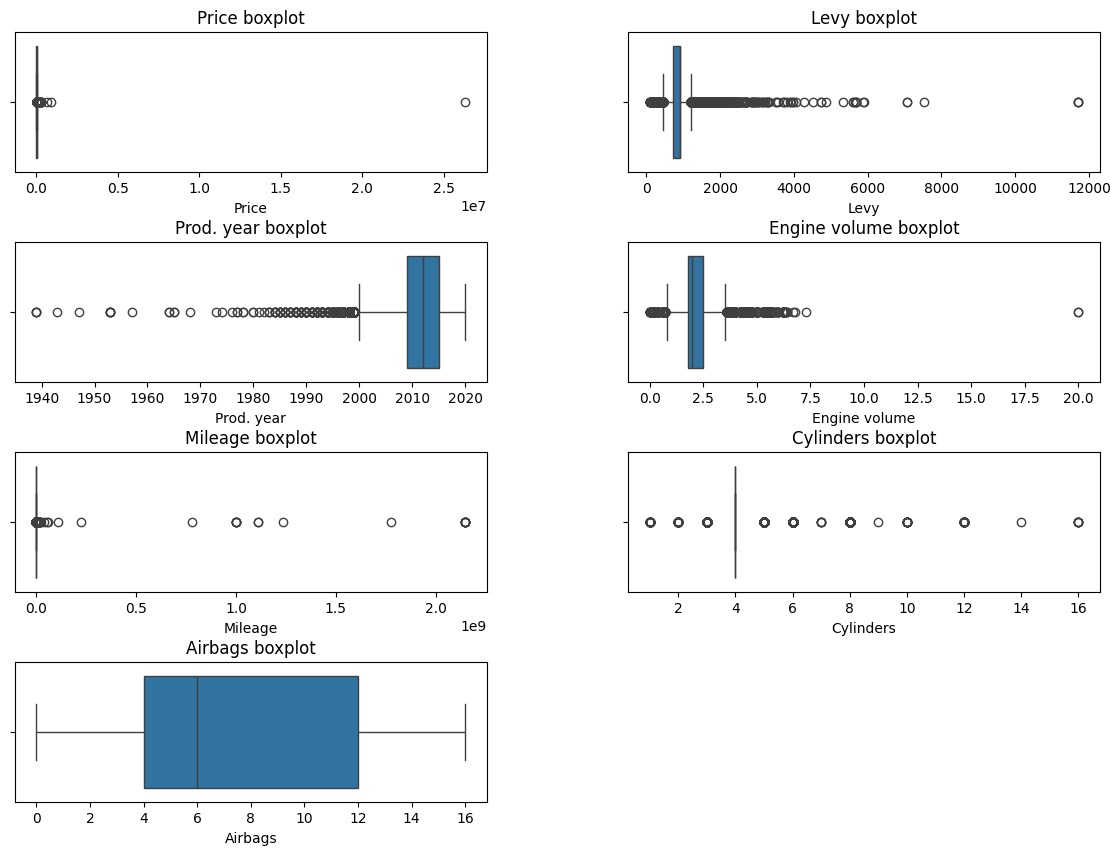

In [17]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [18]:
outliers = []
# Identify outliers using IQR
for col in num_cols:
    # Calculate quartiles and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate fences
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    
    # Identify and count outliers
    outlier_count = ((df[col] < Lower_Fence) | (df[col] > Upper_Fence)).sum()
    
    # Print the number of outliers for each column
    print(f"Column '{col}' has {outlier_count} outliers.")
    # Add to outlier list
    if outlier_count>0:
        outliers.append(col)


Column 'Price' has 1055 outliers.
Column 'Levy' has 3103 outliers.
Column 'Prod. year' has 962 outliers.
Column 'Engine volume' has 1358 outliers.
Column 'Mileage' has 635 outliers.
Column 'Cylinders' has 4765 outliers.
Column 'Airbags' has 0 outliers.


In [19]:
# Compute Z-scores
z_scores = df[outliers].apply(zscore)

# Define a threshold for Z-scores
threshold = 3

# Remove outliers based on Z-score
df = df[(z_scores < threshold).all(axis=1)]

# Print resulting DataFrame
df[outliers].head()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders
0,13328,1399.000000,2010,3.5,186005.0,6.0
1,16621,1018.000000,2011,3.0,192000.0,6.0
2,8467,906.299205,2006,1.3,200000.0,4.0
3,3607,862.000000,2011,2.5,168966.0,4.0
4,11726,446.000000,2014,1.3,91901.0,4.0


In [20]:
corr=df.corr(numeric_only=True)
corr

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
Price,1.000000,0.082621,0.297959,0.134876,-0.032669,0.090243,-0.031805
Levy,0.082621,1.000000,-0.113346,0.555373,0.007619,0.472747,0.080814
Prod. year,0.297959,-0.113346,1.000000,-0.018203,-0.066193,-0.096738,0.242996
Engine volume,0.134876,0.555373,-0.018203,1.000000,0.010988,0.800634,0.222260
Mileage,-0.032669,0.007619,-0.066193,0.010988,1.000000,0.019313,-0.015700
Cylinders,0.090243,0.472747,-0.096738,0.800634,0.019313,1.000000,0.162408
Airbags,-0.031805,0.080814,0.242996,0.222260,-0.015700,0.162408,1.000000


<Axes: >

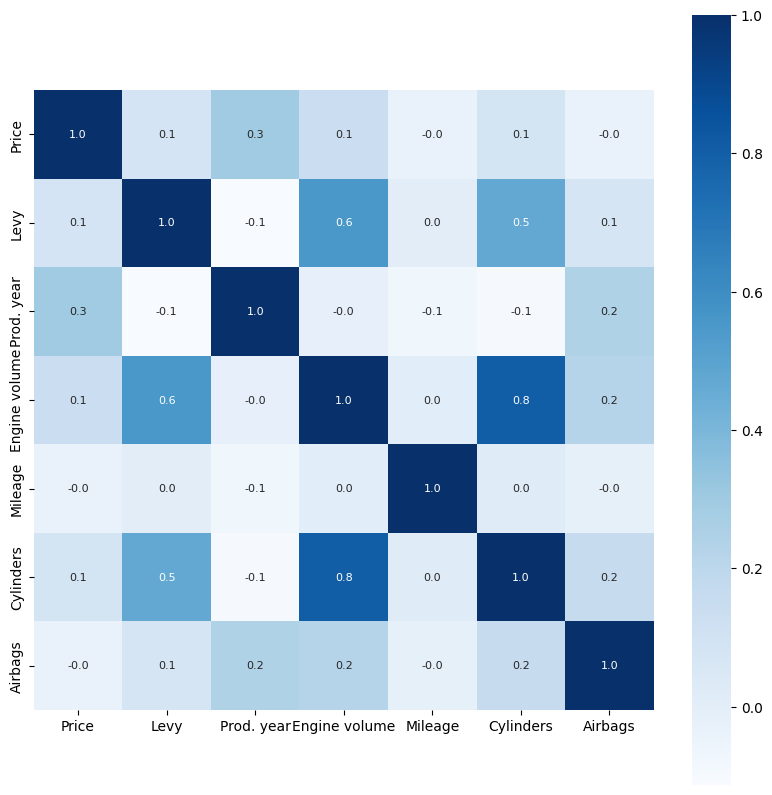

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,annot_kws={'size':8},fmt='.1f',cmap='Blues',cbar=True,square=True)

# Visualizations and Analysis

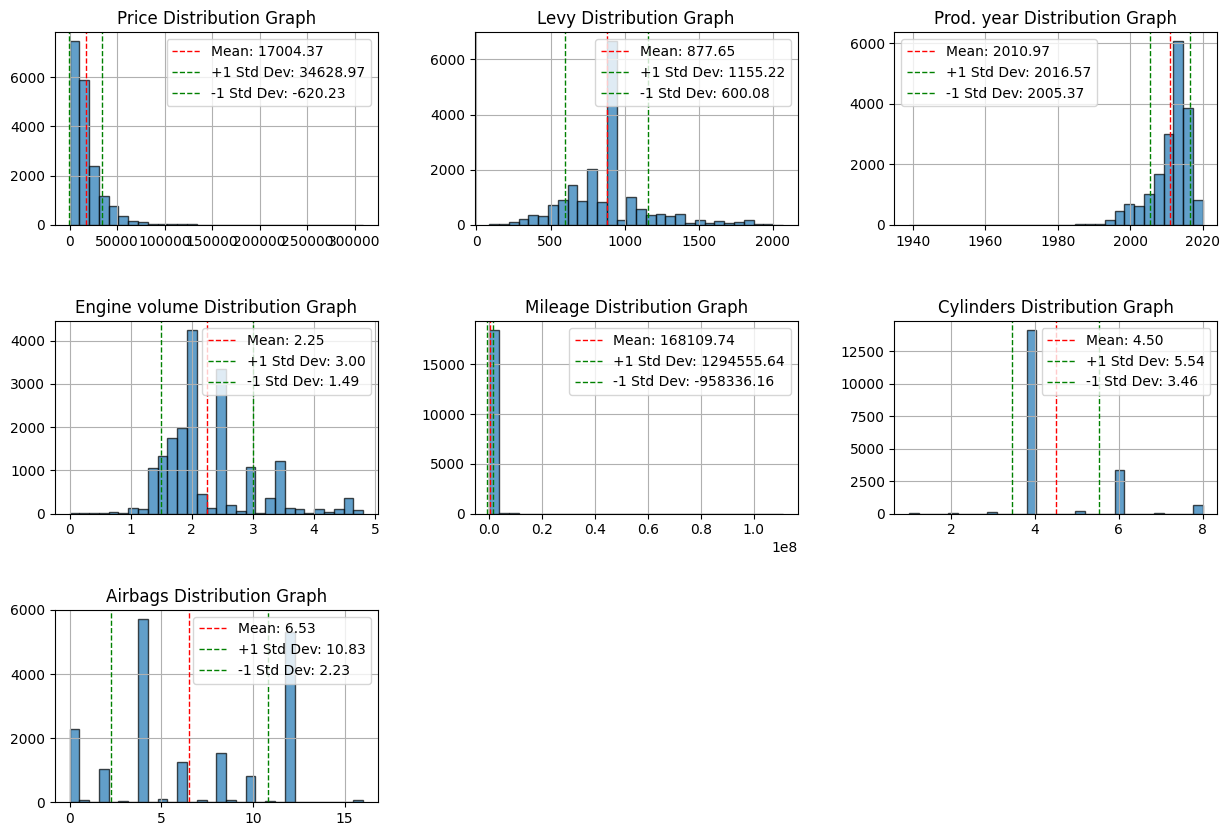

In [22]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    plt.hist(df[col], edgecolor="black", alpha=0.7, bins=30)
    
    mean = df[col].mean()
    std_dev = df[col].std()
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
    plt.axvline(mean + std_dev, color='g', linestyle='dashed', linewidth=1, label=f'+1 Std Dev: {mean + std_dev:.2f}')
    plt.axvline(mean - std_dev, color='g', linestyle='dashed', linewidth=1, label=f'-1 Std Dev: {mean - std_dev:.2f}')
    
    plt.title(f"{col} Distribution Graph")
    plt.legend()
    plt.grid(True)

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [23]:
Manufacturer = df['Manufacturer'].value_counts().reset_index().iloc[0:25]
Manufacturer

,Manufacturer,count
0,HYUNDAI,3722
1,TOYOTA,3548
2,MERCEDES-BENZ,1891
3,FORD,1071
4,CHEVROLET,1033
5,BMW,1001
6,HONDA,947
7,LEXUS,833
8,NISSAN,636
9,VOLKSWAGEN,565


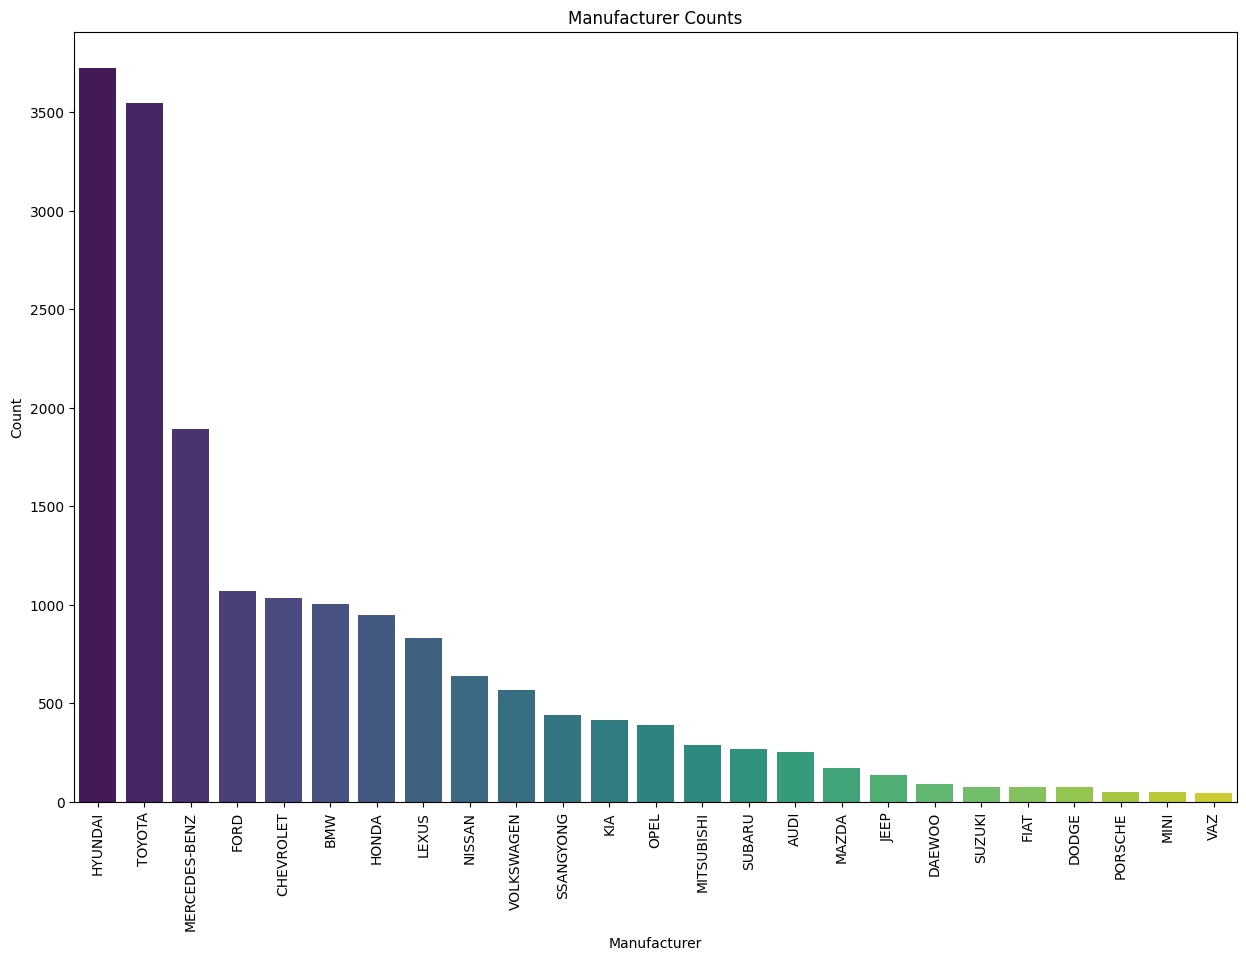

In [24]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Manufacturer', y='count', data=Manufacturer, palette='viridis')
plt.xticks(rotation=90)
plt.title('Manufacturer Counts')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show()

In [25]:
Model = df['Model'].value_counts().reset_index().iloc[:25]
Model

,Model,count
0,Prius,1064
1,Sonata,1064
2,Camry,929
3,Elantra,908
4,Santa FE,527
5,E 350,501
6,FIT,442
7,H1,435
8,Tucson,426
9,X5,342


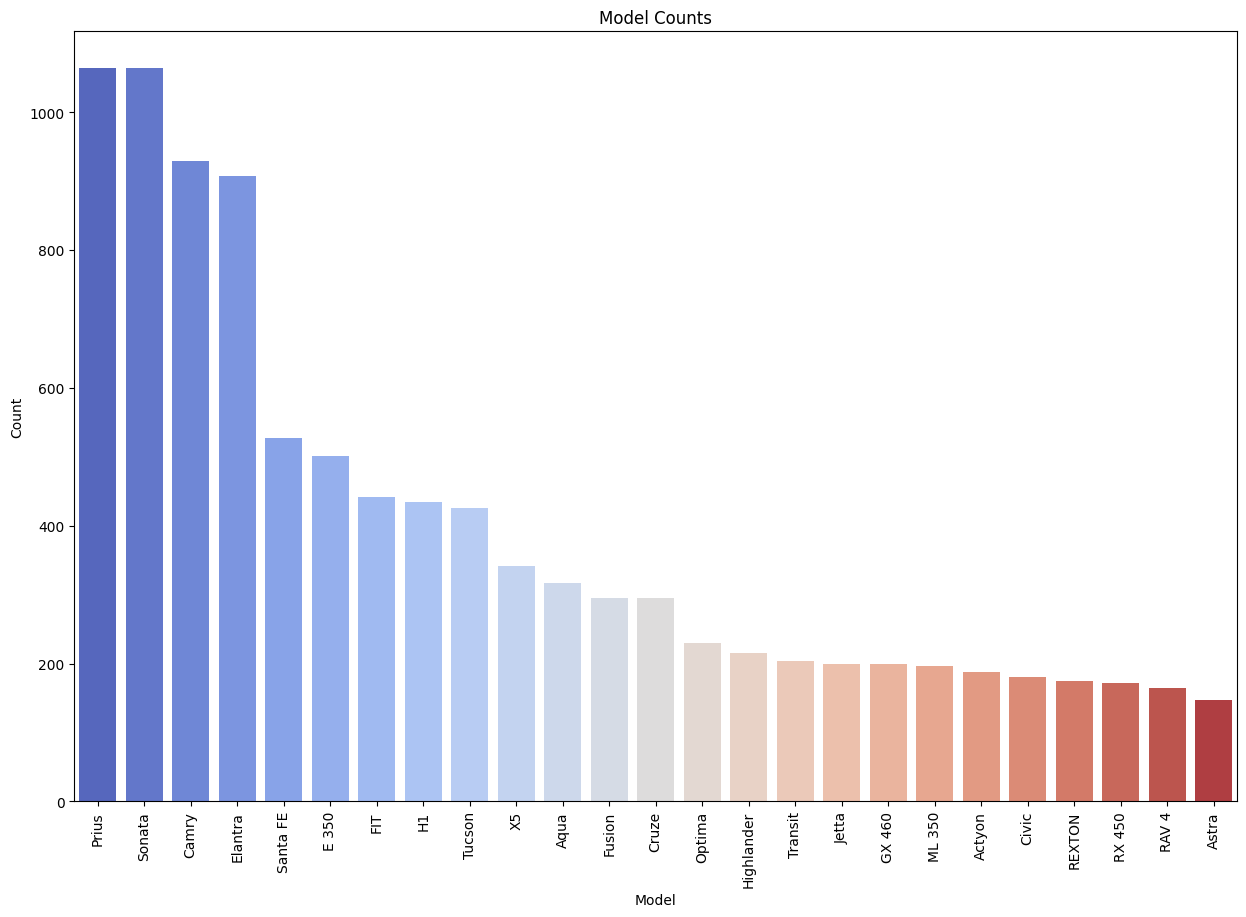

In [26]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Model', y='count', data=Model, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Model Counts')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

In [27]:
Category = df['Category'].value_counts().reset_index() 
Category

,Category,count
0,Sedan,8408
1,Jeep,5173
2,Hatchback,2785
3,Minivan,618
4,Coupe,498
5,Universal,353
6,Microbus,297
7,Goods wagon,223
8,Pickup,46
9,Cabriolet,29


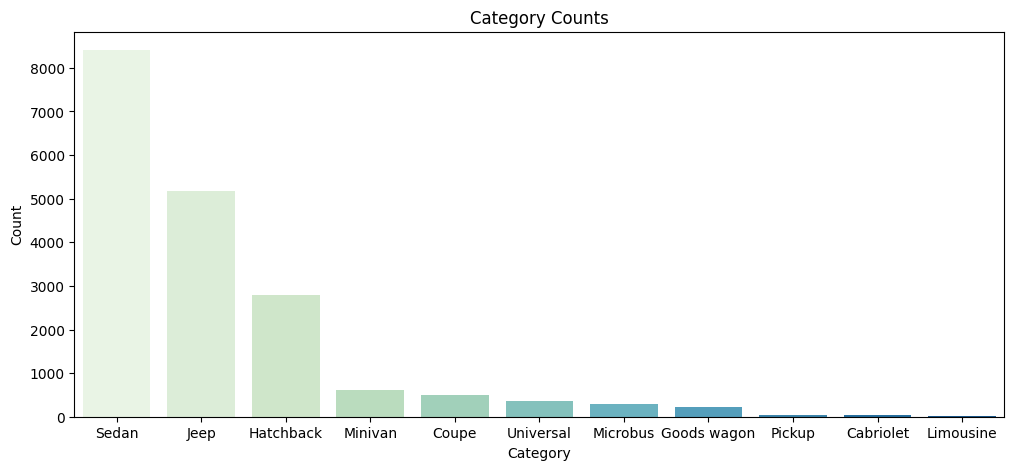

In [28]:
plt.figure(figsize=(12, 5))
sns.barplot(x='Category', y='count', data=Category, palette='GnBu')
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

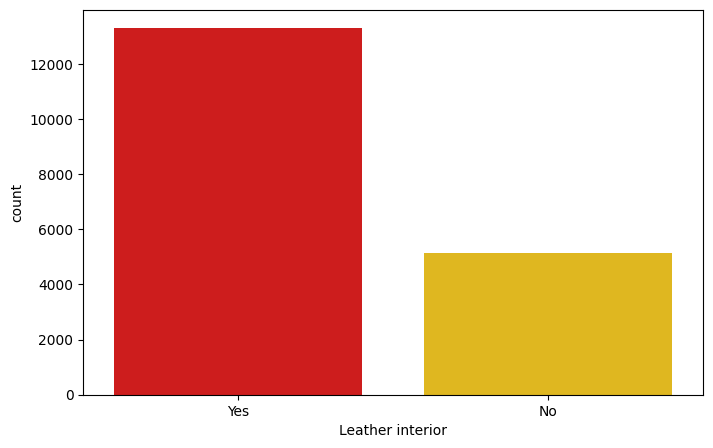

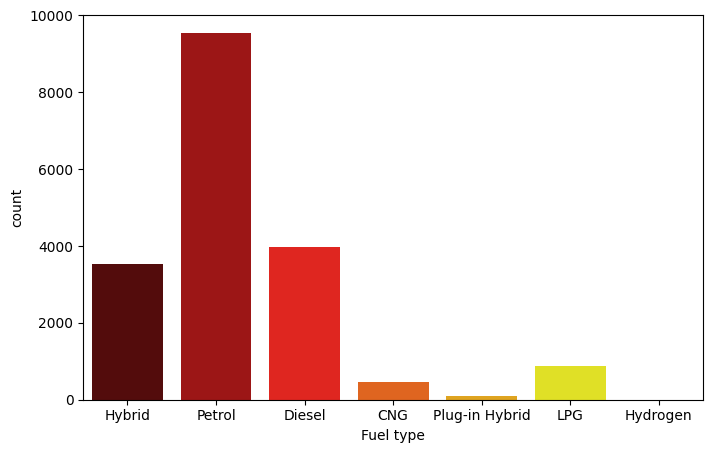

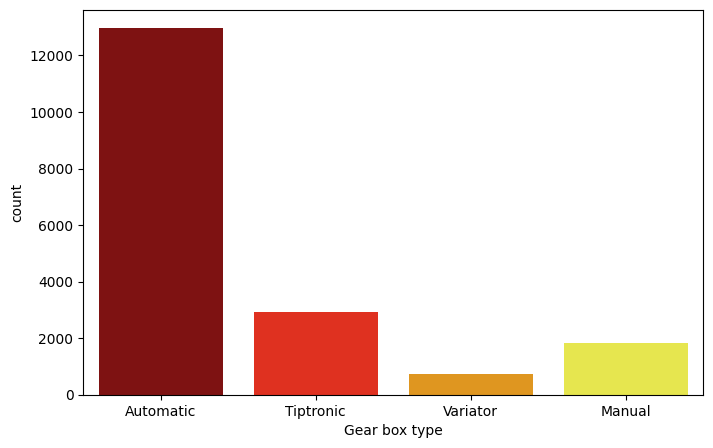

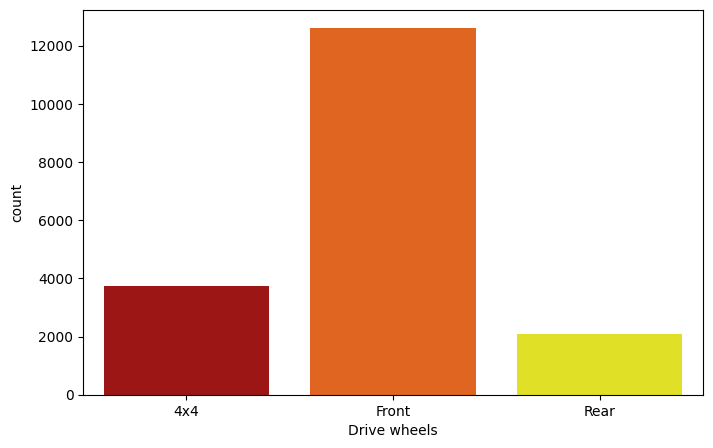

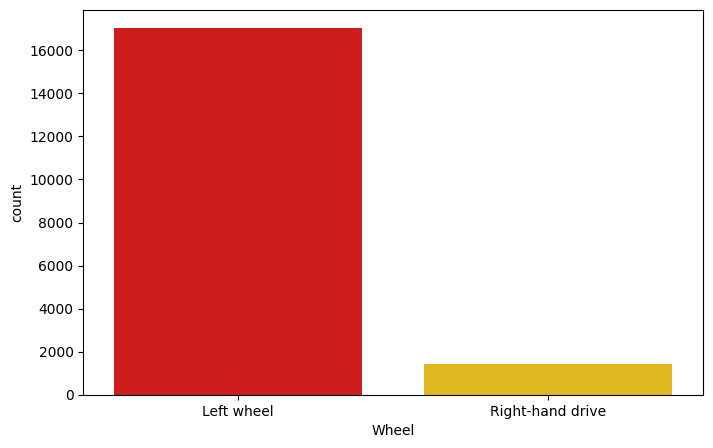

In [29]:
rest_of_cols =['Leather interior','Fuel type','Gear box type','Drive wheels','Wheel']
for col in rest_of_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df,x=col,palette='hot')
    plt.show()

- **Average Prices by year**

In [30]:
average_prices = df.groupby('Prod. year')['Price'].mean().reset_index()
average_prices.head(10)

,Prod. year,Price
0,1939,178.50
1,1943,119172.00
2,1947,150.00
3,1953,17735.25
4,1957,7527.00
5,1964,6585.50
6,1965,65858.00
7,1974,2437.00
8,1976,400.00
9,1977,10340.50


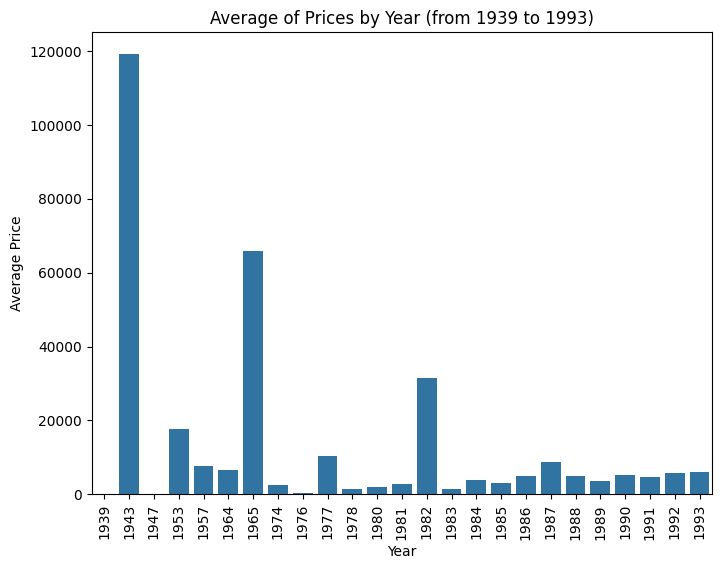

In [31]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Prod. year', y='Price', data=average_prices.head(25))
plt.title('Average of Prices by Year (from 1939 to 1993)')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

plt.show()

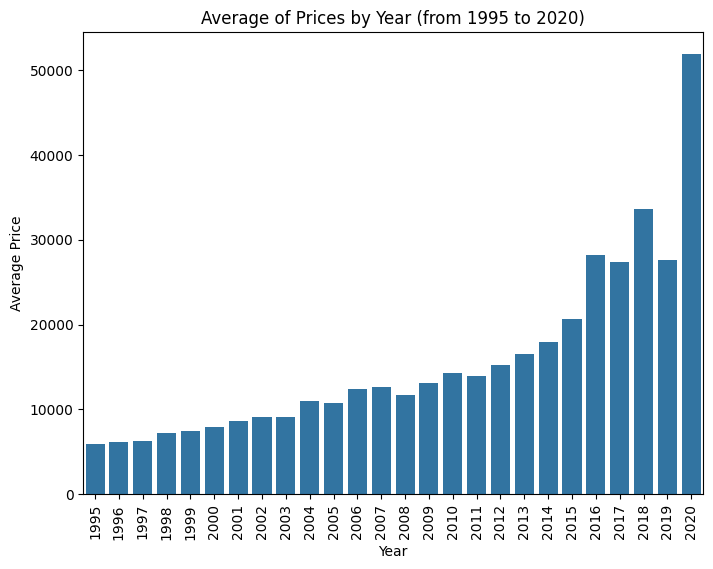

In [32]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Prod. year', y='Price', data=average_prices.iloc[26:,])
plt.title('Average of Prices by Year (from 1995 to 2020)')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

plt.show()

In [33]:
# Find the year associated with the smallest and largest values in the 'Price' col
min_year = average_prices.loc[average_prices['Price'].idxmin(), 'Prod. year']
max_year = average_prices.loc[average_prices['Price'].idxmax(), 'Prod. year']

min_price = average_prices['Price'].min()
max_price = average_prices['Price'].max()

print(f"Smallest Price: {min_price} in {min_year}")
print(f"Largest Price: {max_price} in {max_year}")

Smallest Price: 150.0 in 1947
Largest Price: 119172.0 in 1943


# Encoding And Scaling

In [34]:
num_cols = df.select_dtypes(exclude='object').columns
obj_cols = df.select_dtypes(include='object').columns

# Encoding categorical variables
label_encoder = LabelEncoder()
for col in obj_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Feature scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,-0.208599,1.878309,31,1183,-0.173241,4,1,2,1.658056,0.015887,1.445592,0,0,0,12,1.273341
1,-0.021753,0.505651,8,632,0.005406,4,0,5,0.997129,0.021209,1.445592,2,0,0,1,0.342248
2,-0.484414,0.103219,21,654,-0.887829,3,0,5,-1.250022,0.028311,-0.476340,3,1,1,1,-1.054391
3,-0.760172,-0.056381,16,634,0.005406,4,1,2,0.336202,0.000760,-0.476340,0,0,0,14,-1.519937
4,-0.299497,-1.555135,21,654,0.541348,3,1,5,-1.250022,-0.067656,-0.476340,0,1,0,12,-0.588845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,-0.484414,0.103219,35,371,-2.138359,1,1,0,-0.324725,0.117088,-0.476340,1,2,0,12,-0.356071
19233,-0.075089,-0.168067,23,1265,0.005406,9,1,5,0.204017,-0.005779,-0.476340,2,1,0,11,0.342248
19234,0.516544,-0.150053,23,1372,-0.173241,4,1,1,-0.324725,-0.045938,-0.476340,0,1,0,7,-0.588845
19235,-0.662352,1.478401,8,438,-0.709182,4,1,1,-0.324725,-0.103738,-0.476340,0,1,0,1,-0.588845


# Modeling

In [35]:
X=df.drop('Price',axis=1)
y=df['Price']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=45)

In [51]:
models = [
    (LinearRegression(fit_intercept=True), 'Linear Regression'),
    (DecisionTreeRegressor(
        max_depth=10, 
        min_samples_split=5, 
        min_samples_leaf=2
    ), 'DecisionTreeRegressor'),
    (XGBRegressor(
        n_estimators=1000, 
        learning_rate=0.1, 
        max_depth=7, 
        subsample=0.8, 
        colsample_bytree=0.8, 
        alpha=0.01
    ), 'XGBRegressor'),
    (RandomForestRegressor(
        n_estimators=500, 
        max_depth=15, 
        min_samples_split=5, 
        min_samples_leaf=2, 
        random_state=45
    ), 'RandomForestRegressor')
]

In [52]:
# Train models and store predictions
predictions = []
for model, name in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict and score
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    predictions.append((name, y_pred, score))

# Print metrics
for name, y_pred, score in predictions:
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print('Model:', name)
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R2 Score: {r2:.2f}')
    print(f'Score: {score:.2f}')
    print('-'*25)

Model: Linear Regression
Mean Squared Error: 0.89
R2 Score: 0.21
Score: 0.21
-------------------------
Model: DecisionTreeRegressor
Mean Squared Error: 0.41
R2 Score: 0.64
Score: 0.64
-------------------------
Model: XGBRegressor
Mean Squared Error: 0.28
R2 Score: 0.75
Score: 0.75
-------------------------
Model: RandomForestRegressor
Mean Squared Error: 0.32
R2 Score: 0.71
Score: 0.71
-------------------------
